In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# I'm just using this library function to make the matrix look nice, all calculations for building the array were done without sklearn
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# download all of the datasets into a list of dataframes
group_names = ['groupA', 'groupB', 'groupC']
datasets = []
for name in group_names:
    datasets.append(pd.read_csv(f"./Project1_Data/{name}.txt", header=None))
    # normalize each column 0 and 1
    for i in range(2):
        datasets[-1][i] = datasets[-1][i]/max(datasets[-1][i])

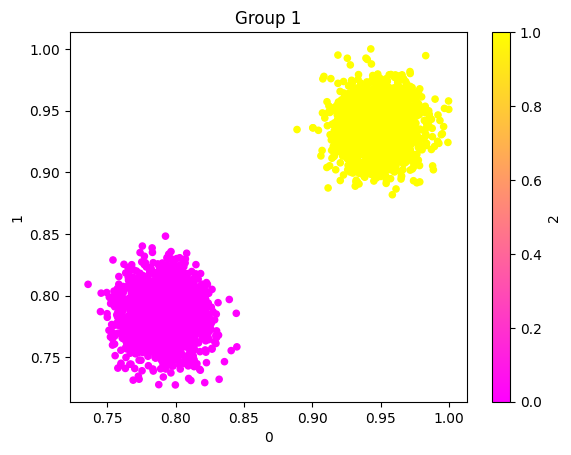

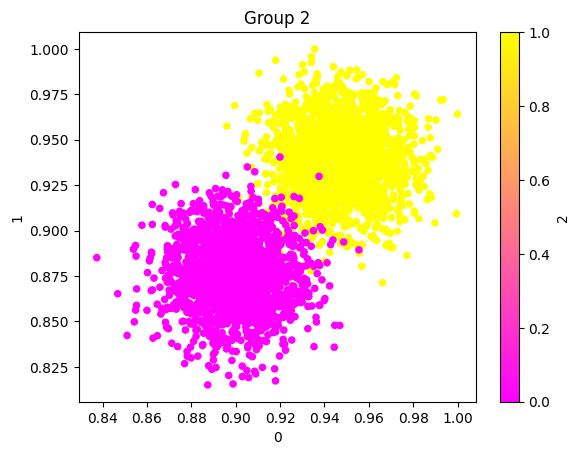

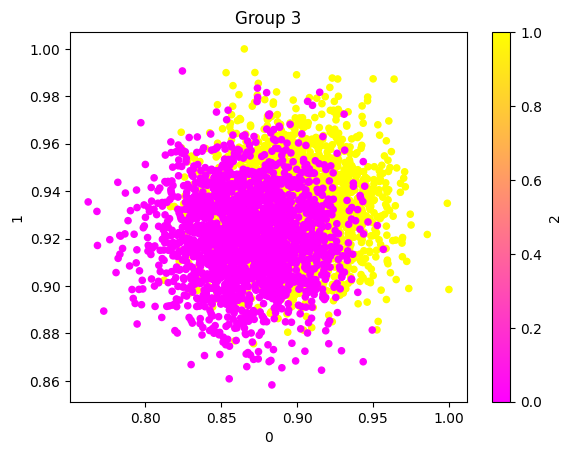

In [71]:
# plot all 3 datasets
for i in range(3):
    datasets[i].plot.scatter(x=0, y=1, c=2, cmap="spring")
    plt.title(f"Group {i+1}")
    plt.savefig(f"group{i+1}_vis.png")

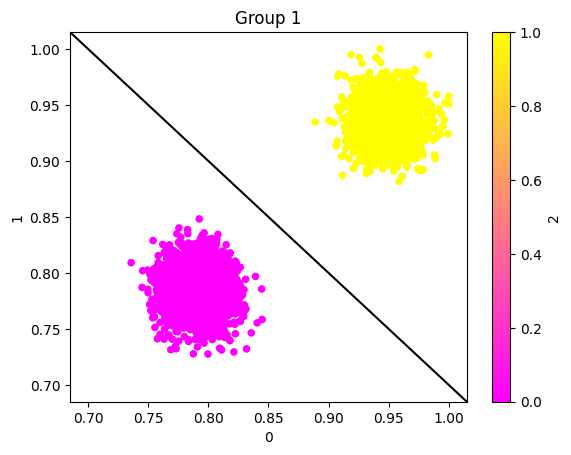

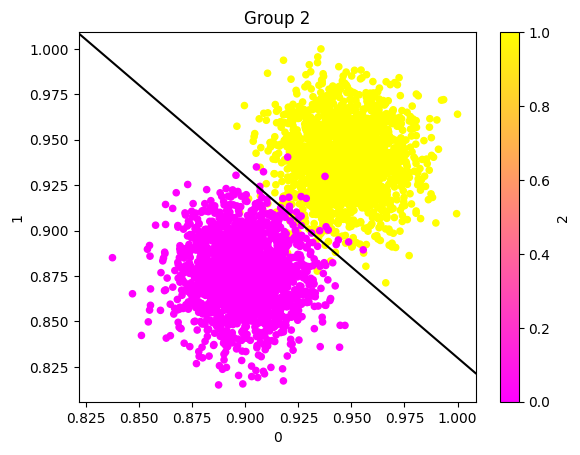

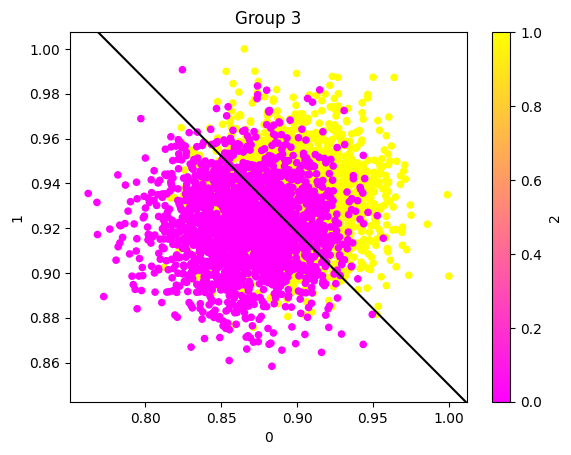

In [72]:
# the 2 points that define these lines (I came up with these points by eyeballing the graphs)
pointsx1 = [1,1,1]
pointsy1 = [0.7,0.83,0.85]
pointsx2 = [0.7,0.83,0.78]
pointsy2 = [1,1,1]
for i, x1, y1, x2, y2 in zip(range(3), pointsx1, pointsy1, pointsx2, pointsy2):
    datasets[i].plot.scatter(x=0, y=1, c=2, cmap="spring")
    plt.axline(xy1=(x1, y1), xy2=(x2,y2), color='black', linestyle='-')
    plt.title(f"Group {i+1}")
    plt.savefig(f"group{i+1}_vis_with_line.png")

In [30]:
# using the points I have above, I will find the line equations that describe each one
lines = []
for i in range(3):
    m = (pointsy2[i] - pointsy1[i]) / (pointsx2[i] - pointsx1[i])
    b = pointsy1[i] - (m * pointsx1[i])
    print(f"For group {i+1}: y = {m:.2f}x + {b:.2f}")
    lines.append([m,b])

For group 1: y = -1.00x + 1.70
For group 2: y = -1.00x + 1.83
For group 3: y = -0.68x + 1.53


The weights are the slopes and the treshholds are the intercepts times -1

In [43]:
# calculating the predicted category and the accurucy of it
for i in range(3):
    dataset = datasets[i]
    m, b = lines[i]
    # the value is predicted to be 1 if the point is above the line, else 0
    dataset['pred'] = (dataset[1] > m * dataset[0] + b).astype(int)
    # record if the values are in the right category or not
    dataset['correct'] = dataset['pred'] == dataset[2]

[[2000    0]
 [   0 2000]]
[[1975   22]
 [  25 1978]]
[[1374  488]
 [ 626 1512]]


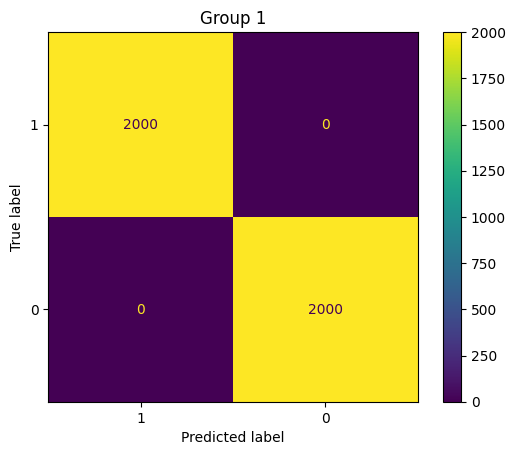

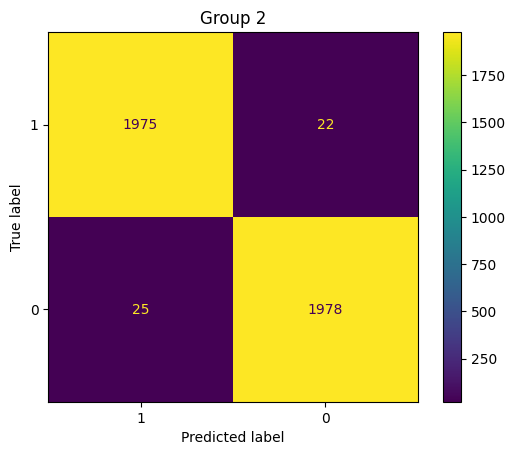

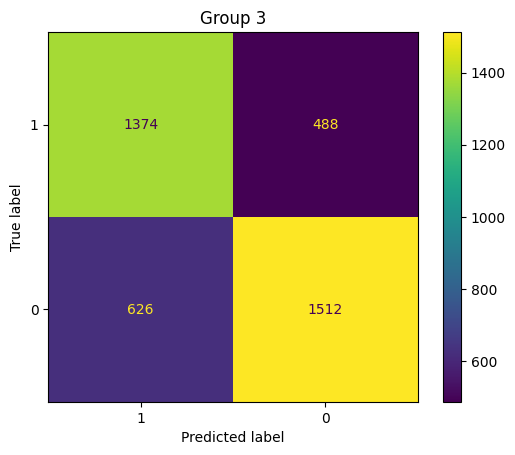

In [73]:
# generate the confusion matrix
i = 1
for dataset in datasets:
    true_pos = len(dataset[(dataset['correct']) & (dataset['pred'] == 1)])
    true_neg = len(dataset[(dataset['correct']) & (dataset['pred'] == 0)])
    false_pos = len(dataset[(~dataset['correct']) & (dataset['pred'] == 1)])
    false_neg = len(dataset[(~dataset['correct']) & (dataset['pred'] == 0)])
    matrix = np.array([[true_pos, false_pos], [false_neg, true_neg]])
    print(matrix)
    ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1,0]).plot()
    plt.title(f"Group {i}")
    plt.savefig(f"group{i}_confusion_mat.png")
    i += 1
    

## Part B

### Part 1: Neuron Definition
Weights:  
- \(w_X = -3\)  
- \(w_Y = +3\)  
- \(w_Z = +1\)  
Threshold: \(T = -1\)  

The net input is:  


$net = -3X + 3Y + Z$


Output rule:


\begin{aligned}
    &\quad o =
    \begin{cases}
        1, & \text{if } net \ge -1 \\
        0, & \text{if } net < -1
    \end{cases}
\end{aligned}




| X | Y | Z | ¬X+Y | Inequality (net vs T) | Output |
|---|---|---|------|------------------------|--------|
| 0 | 0 | 0 | 1    | 0 ≥ -1                 | 1      |
| 0 | 0 | 1 | 1    | 1 ≥ -1                 | 1      |
| 0 | 1 | 0 | 1    | 3 ≥ -1                 | 1      |
| 0 | 1 | 1 | 1    | 4 ≥ -1                 | 1      |
| 1 | 0 | 0 | 0    | -3 ≥ -1 (false)        | 0      |
| 1 | 0 | 1 | 0    | -2 ≥ -1 (false)        | 0      |Z
| 1 | 1 | 0 | 1    | 0 ≥ -1                 | 1      |
| 1 | 1 | 1 | 1    | 1 ≥ -1                 | 1      |

Boolean function implemented by this neuron:


$f(X,Y,Z) = \neg X + Y$


*(equivalent to $X \Rightarrow Y$)*

### Part 2: Threshold Range

The threshold can take any value in the range:

$-2 < T \leq 0$.

